In [36]:
import numpy as np
import pandas as pd
data = pd.read_csv('heart.csv')
print("Dataset Dimensions:", data.shape)


Dataset Dimensions: (303, 14)


In [37]:
print("Columns in Dataset:\n", data.columns)
print("Data Types:\n", data.dtypes)

Columns in Dataset:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [38]:
print("First 5 Rows:\n", data.head())
print("Last 5 Rows:\n", data.tail())

First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Last 5 Rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1 

In [39]:
print("Any Missing Values:\n", data.isnull().sum())

Any Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [40]:
data.info()
print("StaƟsƟcal Summary:\n", data.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


StaƟsƟcal Summary:
           count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0   

In [41]:
data_encoded = pd.get_dummies(data, columns=['sex', 'cp',  'restecg', 'exang', 'slope', 'ca',
'thal'])
print("Encoded Columns:\n", data_encoded.columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

Encoded Columns:
 Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


C:\Users\acer\AppData\Local\Temp\ipykernel_6884\6409949.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=plt.gca())


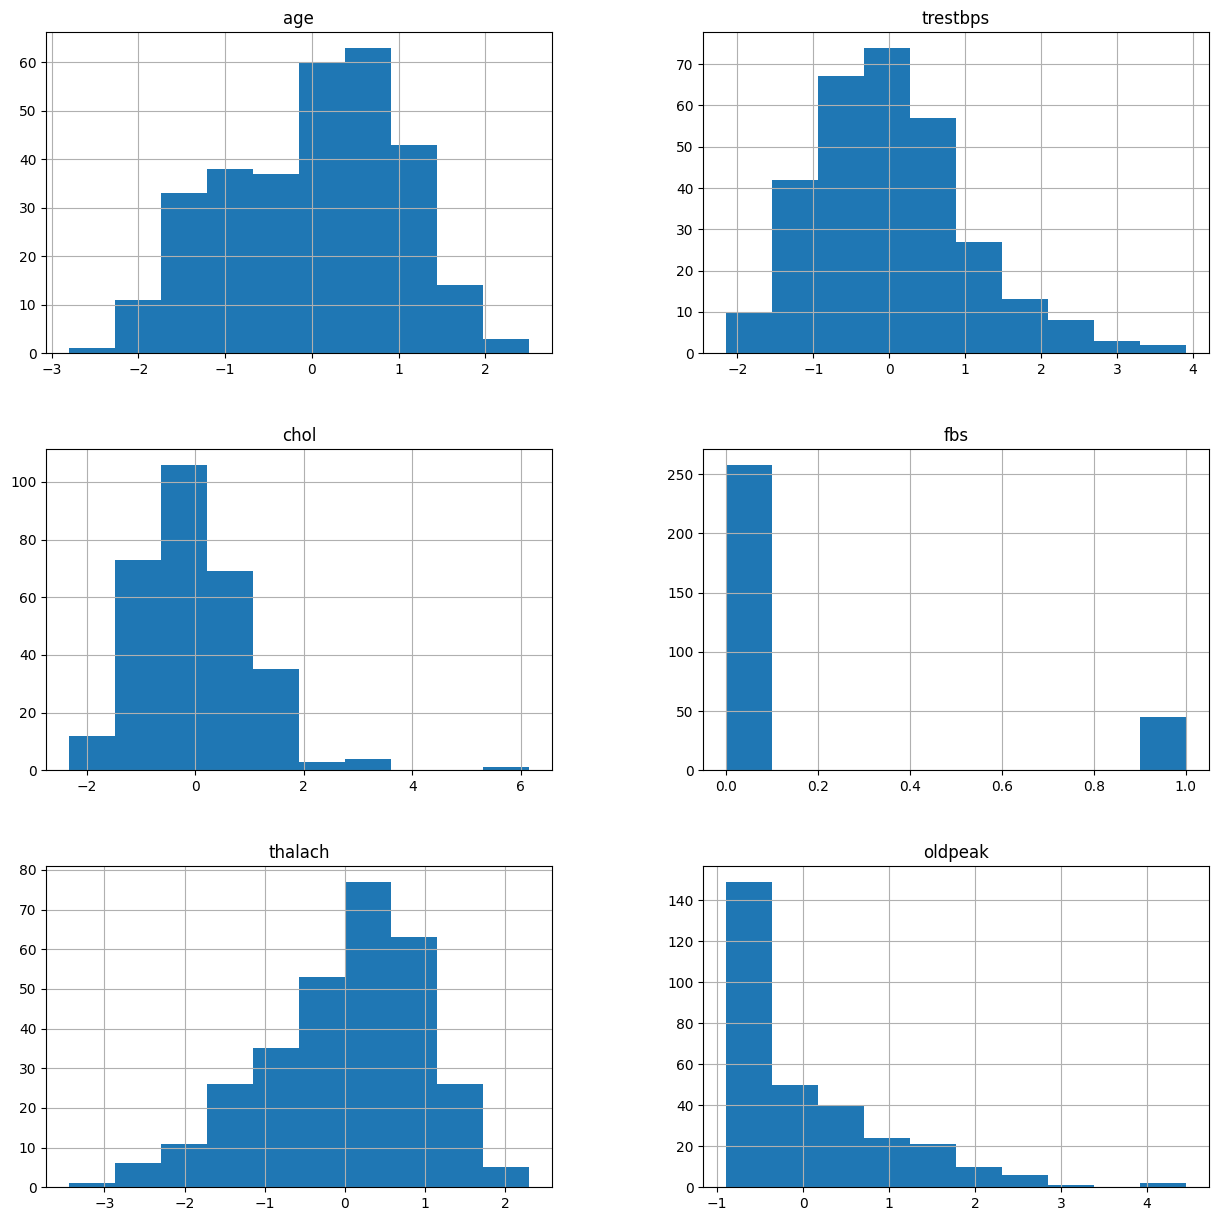

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
X.hist(ax=plt.gca())
plt.show()


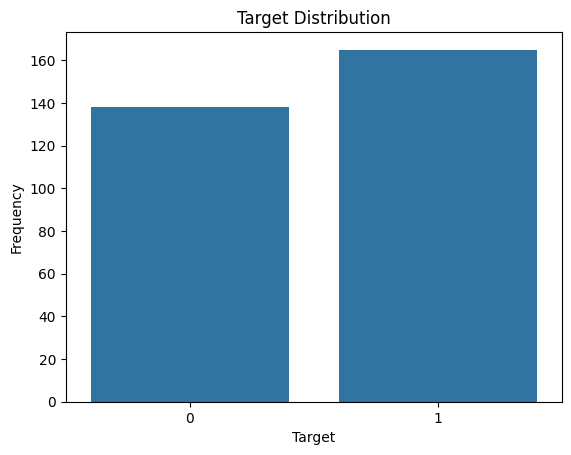

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=data)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

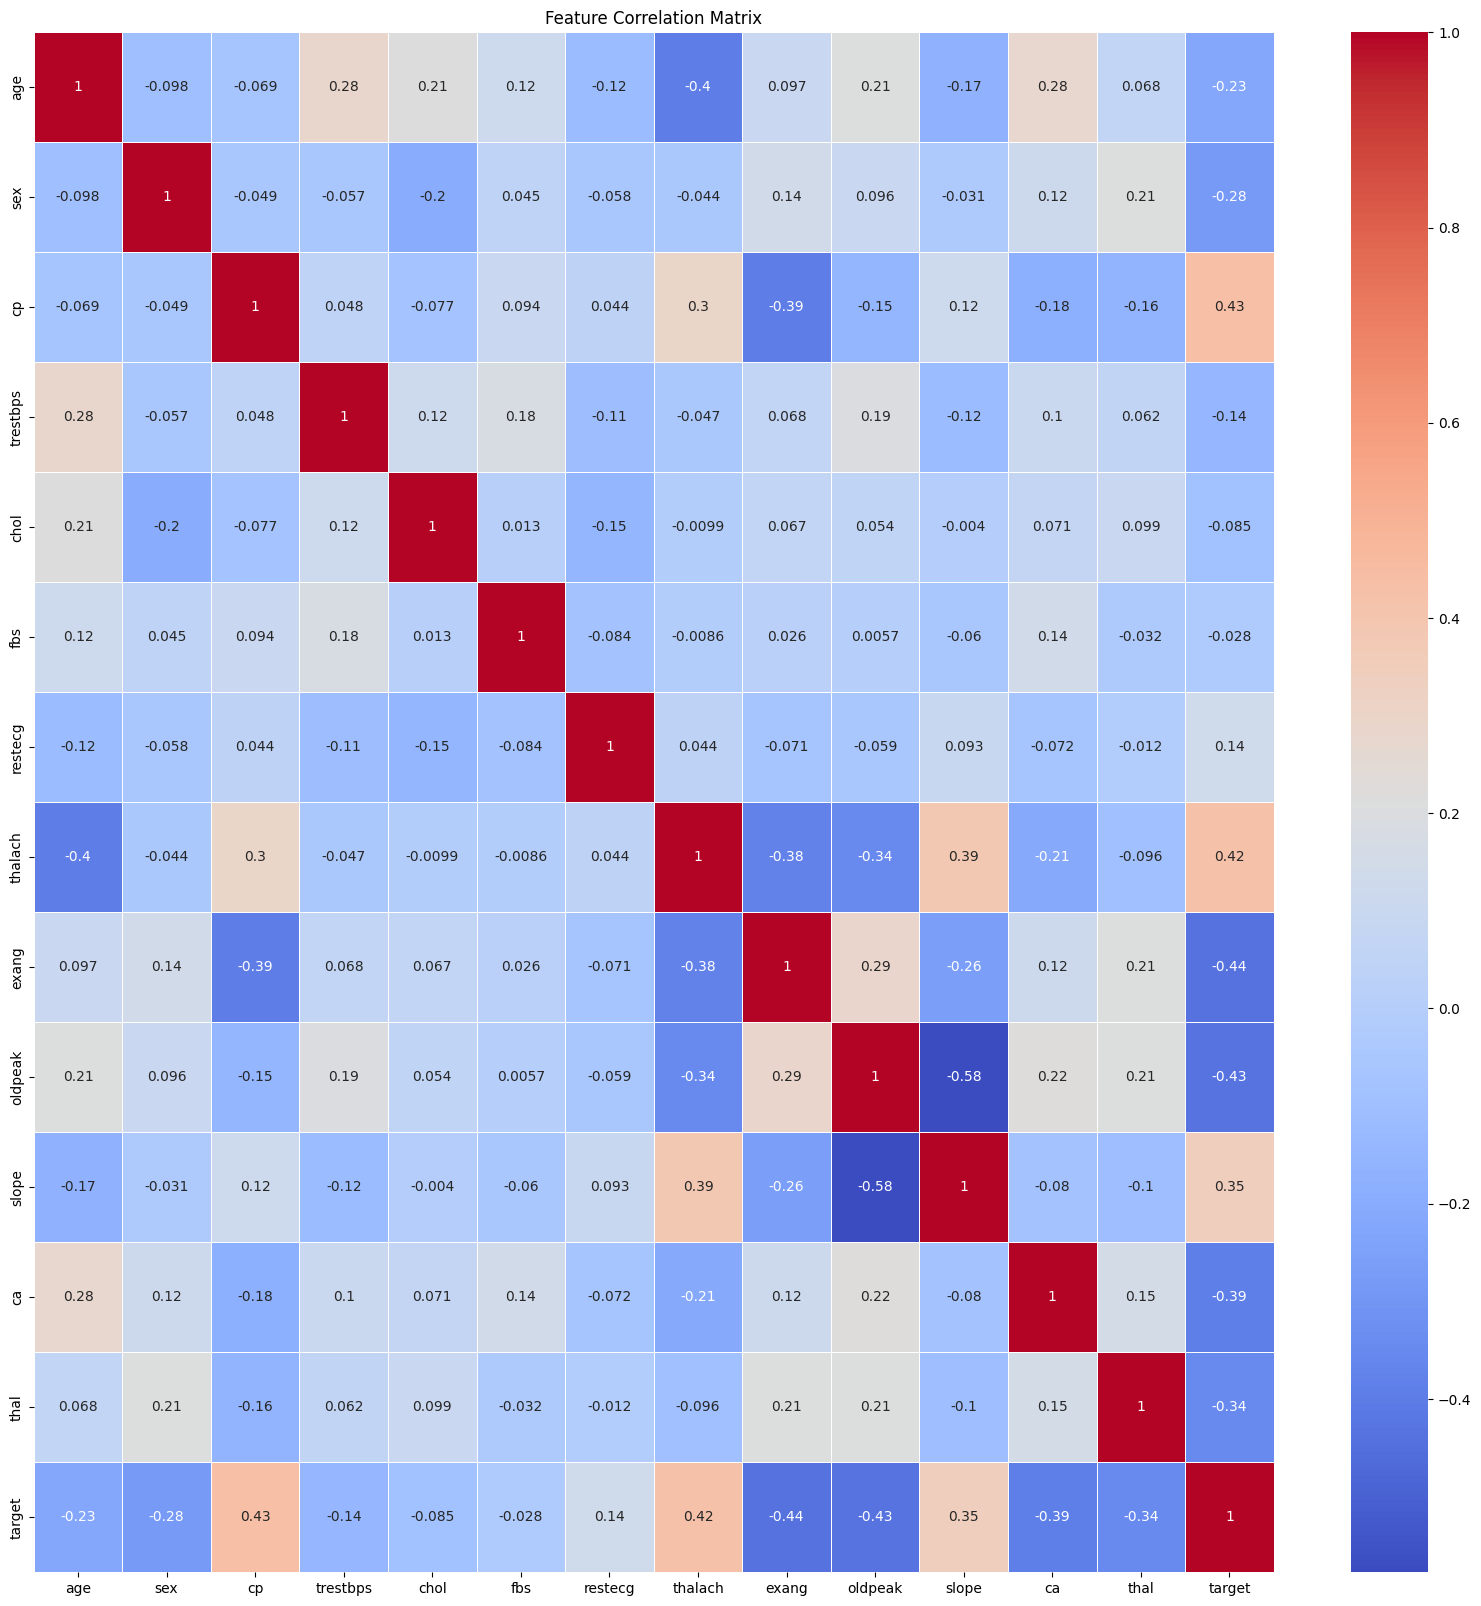

In [44]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [45]:
data_encoded = pd.get_dummies(data, columns=['sex', 'cp',  'restecg', 'exang', 'slope', 'ca','thal'])
print("Encoded Columns:\n", data_encoded.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])
print("after scaling:\n", data_encoded.columns)
print("old columns count:", len(data.columns))
print("new columns count:", len(data_encoded.columns))


Encoded Columns:
 Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
after scaling:
 Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
old columns count: 14
new columns count: 30


In [46]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
n_estimators_range = list(range(10, 101, 10))
forest_accuracy_scores = []

for n in n_estimators_range:
  rf_classifier = RandomForestClassifier(n_estimators=n)
  scores = cross_val_score(rf_classifier,X,y, cv=5)
  forest_accuracy_scores.append(round(scores.mean(), 3))
  

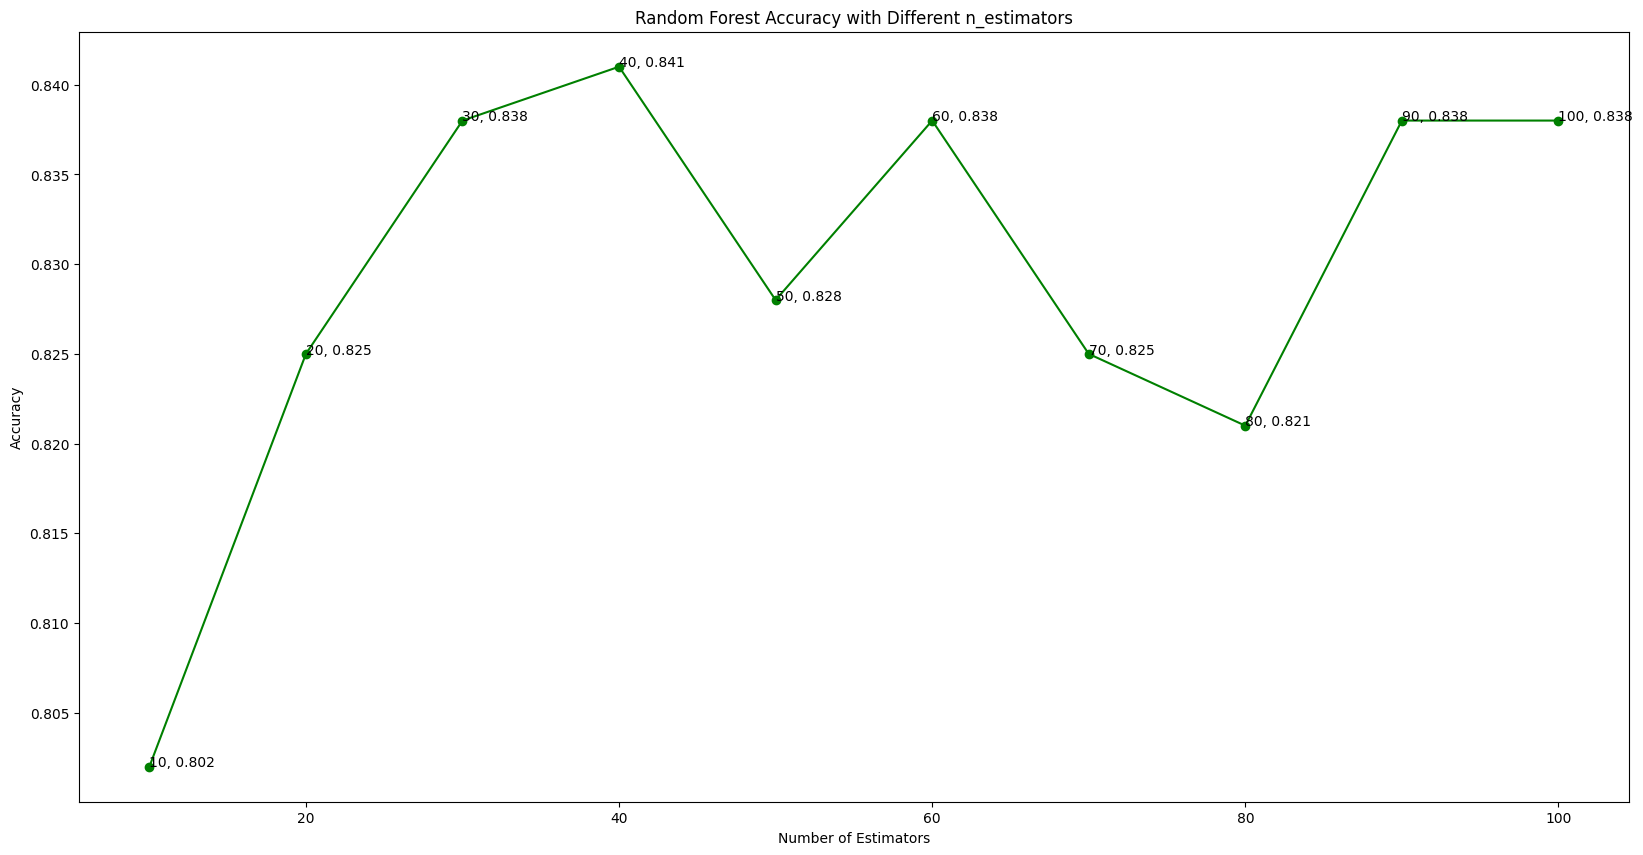

In [47]:
plt.figure(figsize=(20,10))
plt.plot(n_estimators_range, forest_accuracy_scores, marker='o', color='green')
for i, score in enumerate(forest_accuracy_scores):
  plt.text(n_estimators_range[i], score, f'{n_estimators_range[i]}, {score}')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy with Different n_estimators')
plt.show()

In [48]:
final_rf_model = RandomForestClassifier(n_estimators=90)
final_accuracy = cross_val_score(final_rf_model, X, y, cv=5).mean()
print(f"Final Random Forest Accuracy (n_estimators=90): {final_accuracy * 100:.2f}%")

Final Random Forest Accuracy (n_estimators=90): 83.81%


In [49]:
#predicting the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_rf_model.fit(X_train, y_train)
y_pred = final_rf_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 83.61%


In [50]:
#saving this model

import joblib
joblib.dump(final_rf_model, 'final_rf_model.pkl')
print("Model Saved Successfully")


Model Saved Successfully
